# Gathering the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

In [106]:
train_features = pd.read_csv("train_features.csv", index_col="id")
test_features = pd.read_csv("test_features.csv", index_col="id")
train_labels = pd.read_csv("train_labels.csv", index_col="id")

In [ ]:
train_features.head()

,filepath,site
id,,
ZJ000000,train_features/ZJ000000.jpg,S0021
ZJ000001,train_features/ZJ000001.jpg,S0120
ZJ000002,train_features/ZJ000002.jpg,S0121
ZJ000003,train_features/ZJ000003.jpg,S0122
ZJ000004,train_features/ZJ000004.jpg,S0123


In [ ]:
train_features.shape

(16488, 2)

In [ ]:
test_features.head()

,Unnamed: 1,site
id,,
ZJ000001,test_features/ZJZJ000001.jpg,S0082
ZJ000002,test_features/ZJZJ000002.jpg,S0040
ZJ000003,test_features/ZJZJ000003.jpg,S0040
ZJ000004,test_features/ZJZJ000004.jpg,S0041
ZJ000005,test_features/ZJZJ000005.jpg,S0040


In [ ]:
train_labels.head()

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
id,,,,,,,,
ZJ000000,0,0,0,1,0,0,0,0
ZJ000001,0,1,0,0,0,0,0,0
ZJ000002,0,0,0,0,0,0,1,0
ZJ000003,0,1,0,0,0,0,0,0
ZJ000004,0,0,0,0,0,0,1,0


In [51]:
species_labels = sorted(train_labels.columns.unique())
species_labels

['antelope_duiker',
 'bird',
 'blank',
 'civet_genet',
 'hog',
 'leopard',
 'monkey_prosimian',
 'rodent']

# Explore the Data

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


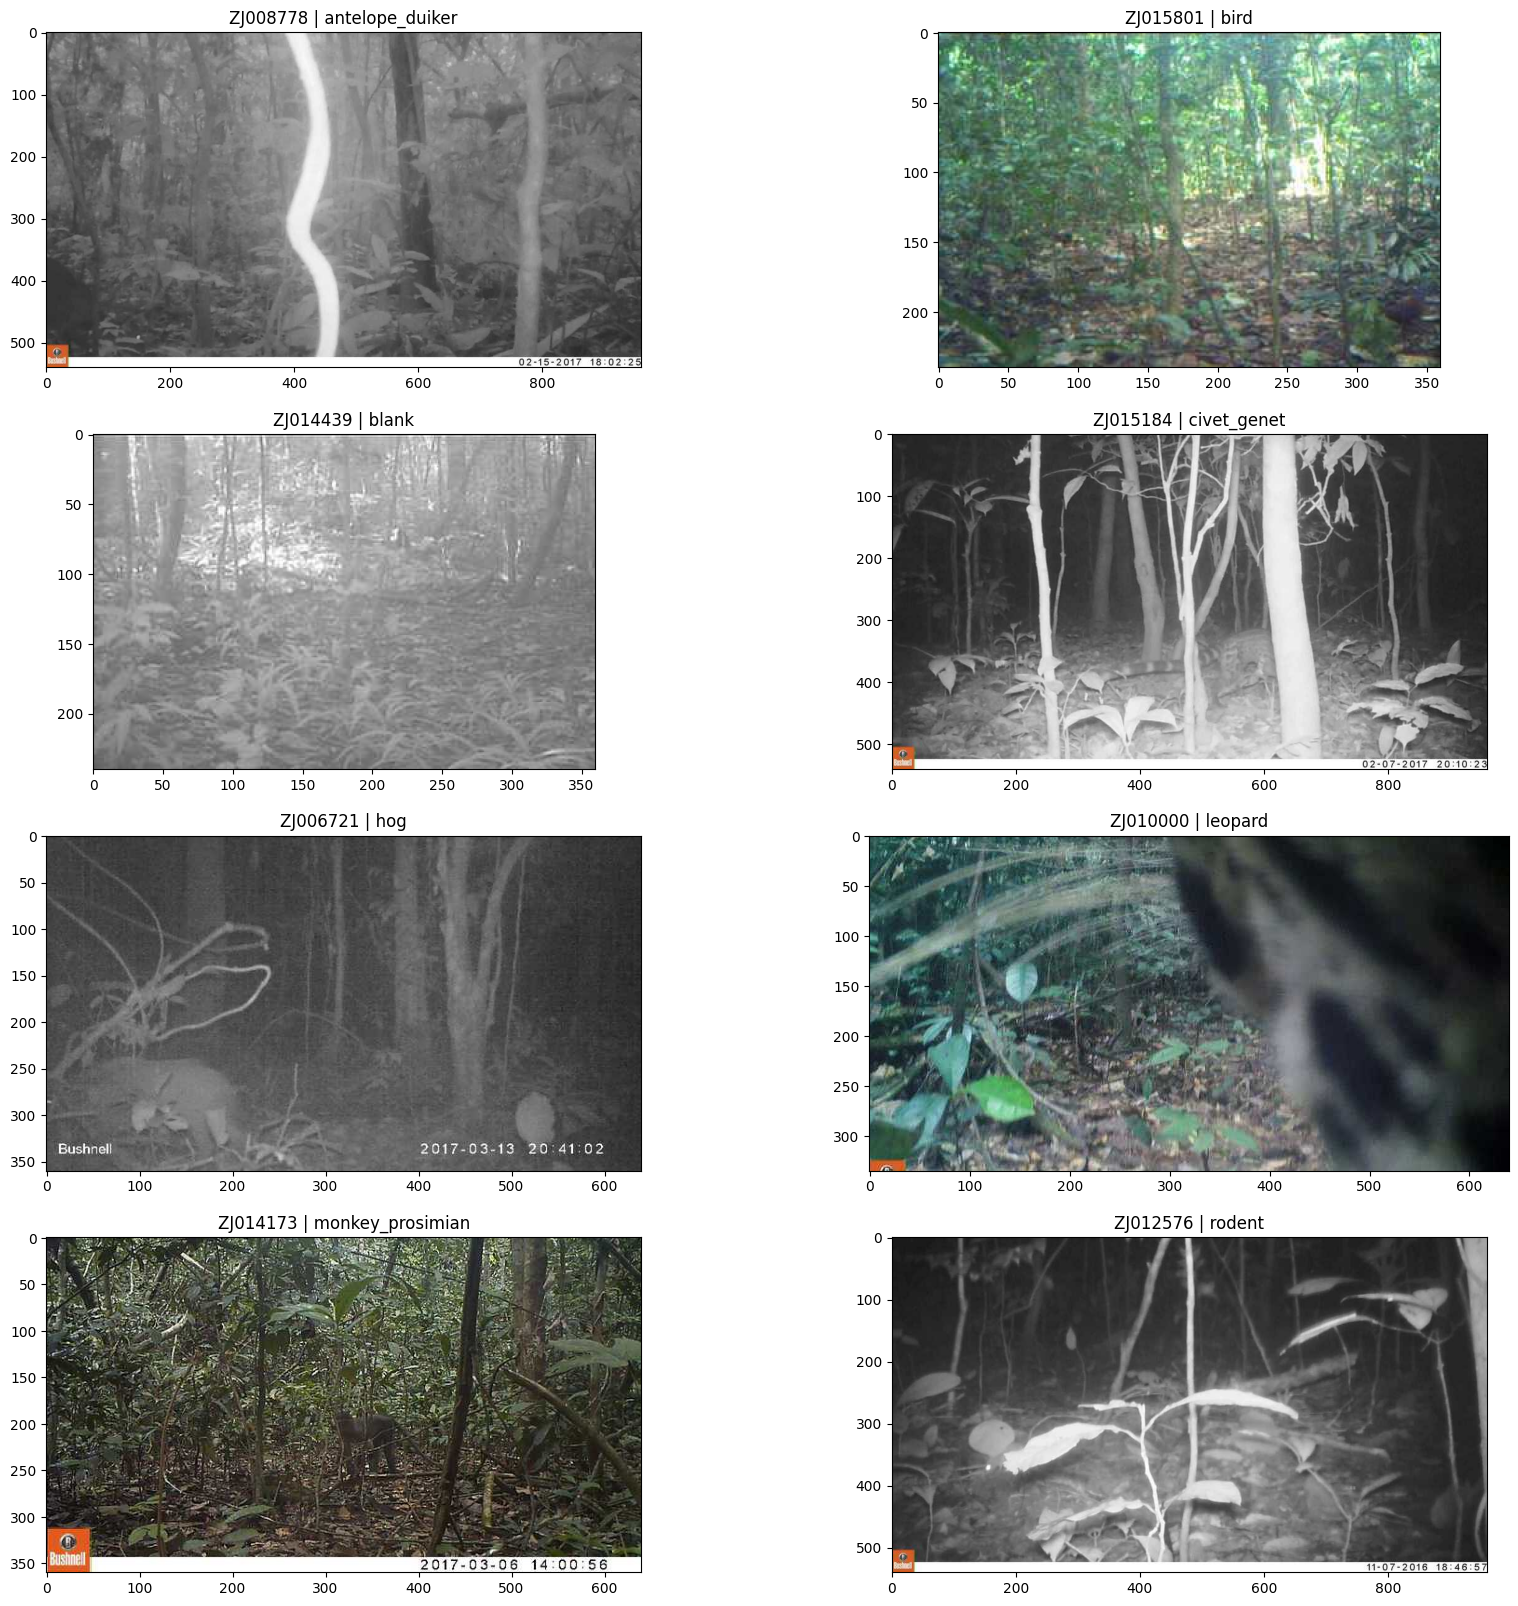

In [ ]:
import os
import matplotlib.pyplot as plt
import multiprocessing
import cv2

# Define a function to load images using OpenCV
def load_image(img_path):
    img = cv2.imread(img_path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Define a function to plot images
def plot_images(species, img_id, img_path, ax):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    ax.set_title(f"{img_id} | {species}")

# Assuming your Google Drive is mounted at '/content/drive/'
drive_root = '/content/drive/'
train_features_dir = os.path.join(drive_root, 'MyDrive', 'Colab Notebooks', 'share_data', 'train_features')

random_state = 20

# Create a multiprocessing pool
pool = multiprocessing.Pool()

# Create a list to store the results
results = []

# Create a figure and axes for plotting
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

# iterate through each species
for species, ax in zip(species_labels, axes.flat):
    # get an image ID for this species
    img_id = (
        train_labels[train_labels.loc[:,species] == 1]
        .sample(1, random_state=random_state)
        .index[0]
    )
    # Construct the filepath
    img_path = os.path.join(train_features_dir, img_id + '.jpg')  # Adjust the extension if needed

    # Load image asynchronously
    result = pool.apply_async(load_image, (img_path,))
    results.append((species, img_id, img_path, result))

# Close the pool
pool.close()
# Wait for all processes to finish
pool.join()

# Plot the images
for i, (species, img_id, img_path, result) in enumerate(results):
    img = result.get()
    ax = axes[i // 2, i % 2]
    plot_images(species, img_id, img_path, ax)

plt.show()

In [ ]:
train_labels.sum().sort_values(ascending=False)

monkey_prosimian    2492
antelope_duiker     2474
civet_genet         2423
leopard             2254
blank               2213
rodent              2013
bird                1641
hog                  978
dtype: int64

In [ ]:
train_labels.sum().divide(train_labels.shape[0]).sort_values(ascending=False)

monkey_prosimian    0.151140
antelope_duiker     0.150049
civet_genet         0.146955
leopard             0.136705
blank               0.134219
rodent              0.122089
bird                0.099527
hog                 0.059316
dtype: float64

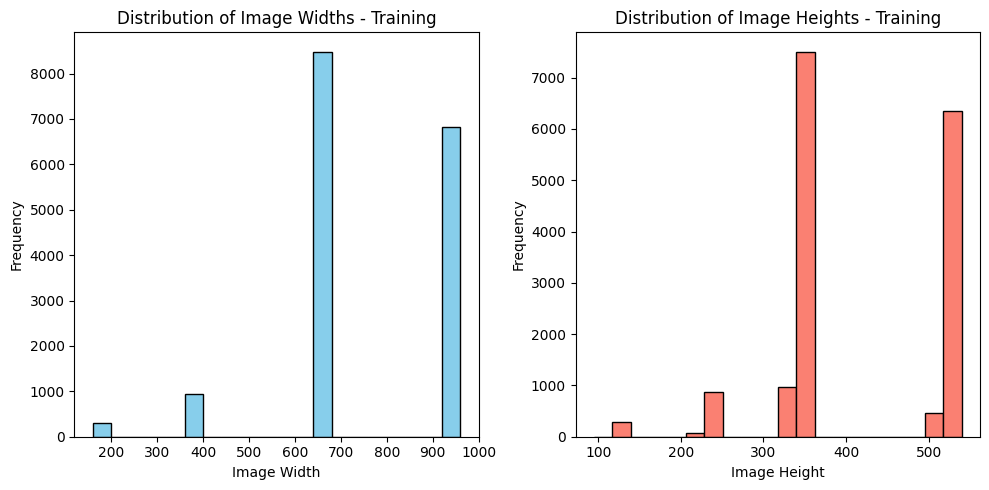

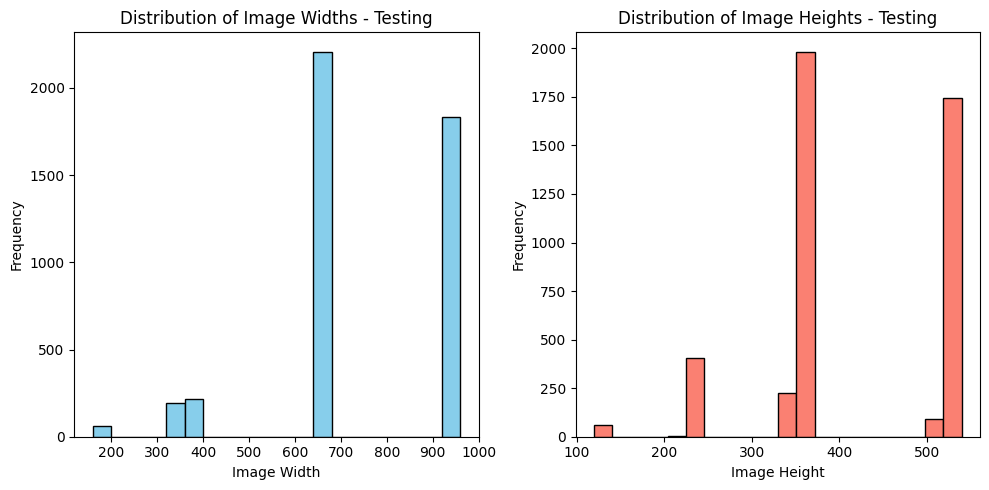

In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

def get_image_dimensions(image_dir):
    # Check if the directory exists
    if os.path.exists(image_dir):
        # Initialize lists to store image dimensions
        image_widths = []
        image_heights = []

        # Loop through each image file in the directory
        for filename in os.listdir(image_dir):
            # Construct the full file path
            filepath = os.path.join(image_dir, filename)

            # Open the image using PIL
            with Image.open(filepath) as img:
                # Get the dimensions of the image
                width, height = img.size

                # Append the dimensions to the lists
                image_widths.append(width)
                image_heights.append(height)

        return image_widths, image_heights
    else:
        print(f"The directory '{image_dir}' does not exist.")
        return [], []

def plot_image_dimension_histograms(image_widths, image_heights, dataset_name):
    # Plot histograms for image widths and heights
    plt.figure(figsize=(10, 5))

    # Histogram for image widths
    plt.subplot(1, 2, 1)
    plt.hist(image_widths, bins=20, color='skyblue', edgecolor='black')
    plt.xlabel('Image Width')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Image Widths - {dataset_name}')

    # Histogram for image heights
    plt.subplot(1, 2, 2)
    plt.hist(image_heights, bins=20, color='salmon', edgecolor='black')
    plt.xlabel('Image Height')
    plt.ylabel('Frequency')
    plt.title(f'Distribution of Image Heights - {dataset_name}')

    plt.tight_layout()
    plt.show()


# Directory where your images are stored
train_image_dir = '/content/drive/MyDrive/Colab Notebooks/share_data/train_features'
test_image_dir = '/content/drive/MyDrive/Colab Notebooks/share_data/test_features'

# Step 1: Get dimensions for training dataset
train_image_widths, train_image_heights = get_image_dimensions(train_image_dir)

# Step 2: Get dimensions for testing dataset
test_image_widths, test_image_heights = get_image_dimensions(test_image_dir)

# Step 3: Plot distribution for training dataset
plot_image_dimension_histograms(train_image_widths, train_image_heights, 'Training')

# Step 4: Plot distribution for testing dataset
plot_image_dimension_histograms(test_image_widths, test_image_heights, 'Testing')

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def read_csv_files(train_features_path, test_features_path):
    # Read the training and testing CSV files
    train_features = pd.read_csv(train_features_path)
    test_features = pd.read_csv(test_features_path)
    return train_features, test_features

In [ ]:
def plot_camera_trap_distribution(features_df, dataset_name):
    # Get top N most frequent camera trap sites
    top_n_sites = features_df['site'].value_counts().nlargest(10)  # Adjust the number as needed

    # Filter features DataFrame to include only top N sites
    filtered_df = features_df[features_df['site'].isin(top_n_sites.index)]

    plt.figure(figsize=(10, 6))
    sns.countplot(data=filtered_df, y='site', palette='pastel')
    plt.title(f'Top 10 Camera Trap Sites - {dataset_name}')
    plt.xlabel('Frequency')
    plt.ylabel('Camera Trap Site')
    plt.tight_layout()
    plt.show()

<ipython-input-16-ad03de676c1b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y='site', palette='pastel')


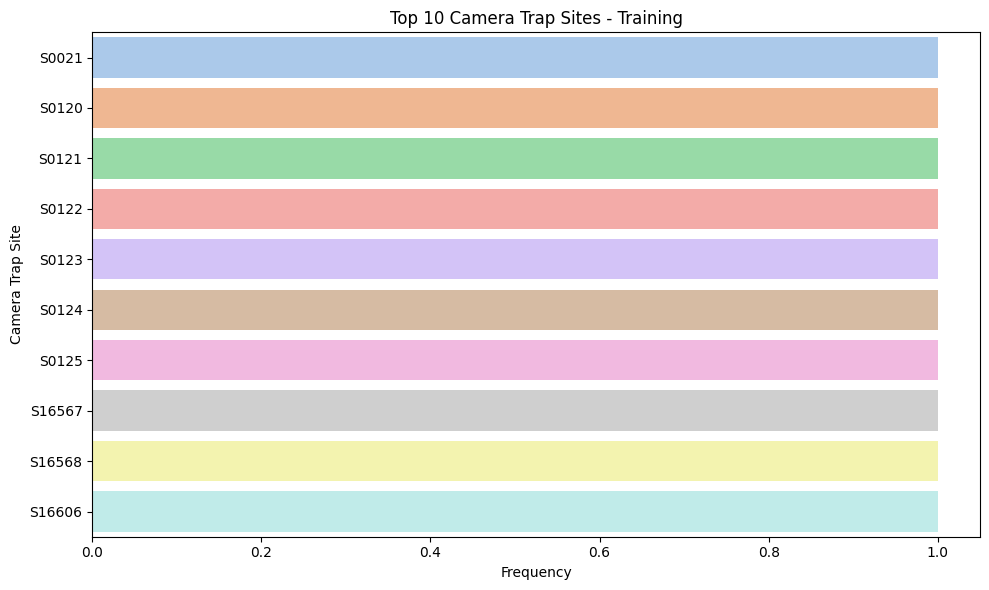

<ipython-input-16-ad03de676c1b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, y='site', palette='pastel')


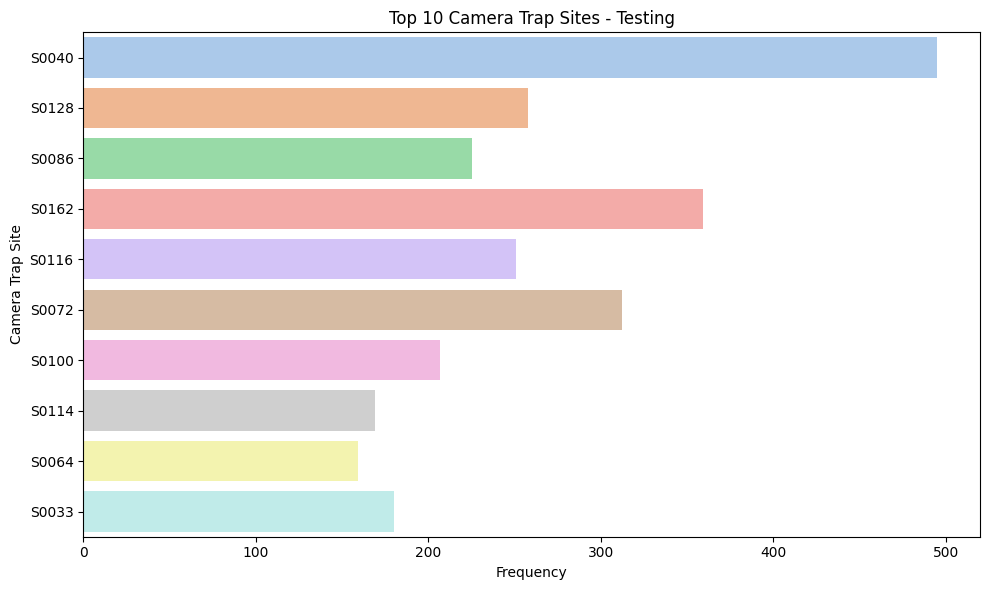

In [ ]:
# Paths to the CSV files
train_features_path = "train_features.csv"
test_features_path = "test_features.csv"

# Step 1: Read the training and testing CSV files
train_features, test_features = read_csv_files(train_features_path, test_features_path)

# Step 2: Plot distribution for training dataset
plot_camera_trap_distribution(train_features, 'Training')

# Step 3: Plot distribution for testing dataset
plot_camera_trap_distribution(test_features, 'Testing')

# Split into Train and Evaluation Sets

In [52]:
from sklearn.model_selection import train_test_split

# Reset the indices of train_features and train_labels
train_features.reset_index(drop=True, inplace=True)
train_labels.reset_index(drop=True, inplace=True)

y = train_labels
x = train_features.loc[y.index].filepath.to_frame()

# note that we are casting the species labels to an indicator/dummy matrix
x_train, x_val, y_train, y_val = train_test_split(
    x, y, stratify=y, test_size=0.15
)

In [ ]:
x_train

,filepath
9267,train_features/ZJ009267.jpg
13352,train_features/ZJ013352.jpg
12556,train_features/ZJ012556.jpg
450,train_features/ZJ000450.jpg
11559,train_features/ZJ011559.jpg
...,...
9135,train_features/ZJ009135.jpg
5736,train_features/ZJ005736.jpg
1638,train_features/ZJ001638.jpg
9712,train_features/ZJ009712.jpg


In [ ]:
y_train

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
9267,1,0,0,0,0,0,0,0
13352,1,0,0,0,0,0,0,0
12556,0,1,0,0,0,0,0,0
450,0,1,0,0,0,0,0,0
11559,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
9135,0,0,0,0,0,0,0,1
5736,0,0,0,0,1,0,0,0
1638,0,0,0,0,0,1,0,0
9712,0,0,0,0,0,1,0,0


In [ ]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((14014, 1), (14014, 8), (2474, 1), (2474, 8))

Next, let's validate that our split has resulted in roughly similar relative distributions of species across the train and eval sets (because of how we passed stratify=y above).

In [53]:
import numpy as np
split_pcts = pd.DataFrame(
    {
        "train": y_train.idxmax(axis=1).value_counts(normalize=True),
        "eval": y_val.idxmax(axis=1).value_counts(normalize=True),
    }
)
print("Species percentages by split")
print((split_pcts.fillna(0) * 100).astype(int).applymap(lambda x: f"{x}%" if not np.isnan(x) else ""))

Species percentages by split
                 train eval
monkey_prosimian   15%  15%
antelope_duiker    15%  14%
civet_genet        14%  14%
leopard            13%  13%
blank              13%  13%
rodent             12%  12%
bird                9%   9%
hog                 5%   5%


# Data Pre-processing

## Image Augmentation
1. Horizontal flip(p=0.5)
2. Vertical flip(p=0.5)
3. Rotation (Angle=15)
4. Color jittering(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1)
5. RandomGrayScale(p=0.2)
6. GaussianBlur(kernel_size=3)
7. RandomMotionBlur(kernel_size=3)
8. RandomAdjustSharpness(sharpness_factor=1.5)
9. RandomGamma(gamma=(0.9, 1.1))

In [54]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from PIL import Image
import os
import random
import matplotlib.pyplot as plt

# Define the dataset class
class CustomDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.image_files = os.listdir(data_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.data_dir, self.image_files[idx])
        image = Image.open(img_name)

        # Convert to RGB if the image is grayscale
        if image.mode != 'RGB':
            image = image.convert('RGB')

        if self.transform:
            image_augmented = self.transform(image)
            return image, image_augmented
        else:
            return image, image  # Return original image if no transformation is applied

In [55]:
# Define the directory path
data_directory = '/content/drive/MyDrive/Colab Notebooks/share_data/train_features'

# Define the transformations
data_transforms = [
    (transforms.Resize((256,256)), "Resize"),
    (transforms.RandomHorizontalFlip(), "HorizontalFlip"),
    (transforms.RandomVerticalFlip(), "VerticalFlip"),
    (transforms.RandomRotation(degrees=15), "RandomRotation"),  # Reduced rotation angle for daytime photos
    (transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05), "ColorJitter"),  # Reduced intensity for daytime photos
    (transforms.RandomGrayscale(), "RandomGrayscale"),  # Reduced probability for grayscale conversion
    (transforms.GaussianBlur(kernel_size=3), "GaussianBlur"),  # Smaller kernel size for subtle blurring
    (transforms.RandomAffine(degrees=30, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=15), "RandomAffine"),
    (transforms.RandomAdjustSharpness(sharpness_factor=1.5), "Sharpen"),  # Reduced sharpness factor
]

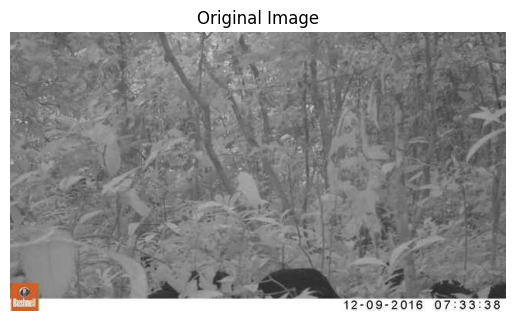

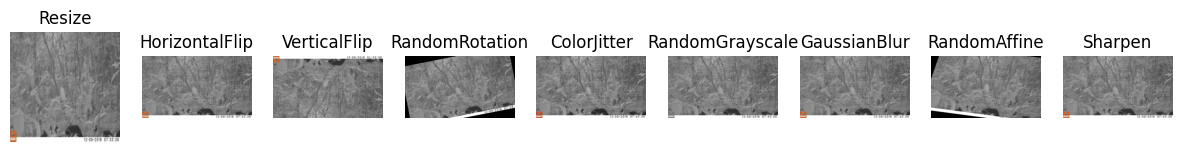

In [ ]:
# Create an instance of the dataset
dataset = CustomDataset(data_dir=data_directory)

# Select a random image
random_idx = random.randint(0, len(dataset)-1)
original_image, _ = dataset[random_idx]

# Display the original image
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Apply each transformation separately and display the augmented
# images with their transformation names
fig, axes = plt.subplots(1, len(data_transforms), figsize=(15, 5))
for i, (transform, transform_name) in enumerate(data_transforms):
    augmented_image = transform(original_image)
    axes[i].imshow(augmented_image)
    axes[i].set_title(f'{transform_name}')
    axes[i].axis('off')
plt.show()

# Build The Model

Now we can start building our model.

## The Dataset
First, we'll create an ImagesDataset class that will define how we access our data and any transformations we might want to apply.

This new class will inherit from the PyTorch Dataset class, but we'll also need to define our own __init__, __len__ and __getitem__ special methods:

1. __init__ will instantiate the dataset object with two dataframes: an x_train df containing image IDs and image file paths, and a y_train df containing image IDs and labels. This will run once when we first create the dataset object, e.g. with dataset = ImagesDataset(x_train, y_train).
2. __getitem__ will define how we access a sample from the data. This method gets called whenever we use an indexing operation like dataset[index]. In this case, whenever accessing a particular image sample (for example, to get the first image we'd do dataset[0]) the following will happen:
* look up the image filepath using the index
* load the image with PIL.Image
* apply some transformations (more on this below)
* return a dictionary containing the image ID, the image itself as a Tensor, and a label (if it exists)
3. __len__ simply returns the size of the dataset, which we do by calling len on the input dataframe.

In [107]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
import os

# Define your dataset class
class ImagesDataset(Dataset):
    def __init__(self, x_df, y_df=None):
        self.data = x_df
        self.label = y_df
        self.transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomVerticalFlip(),
            transforms.RandomRotation(degrees=15),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.05),
            transforms.RandomGrayscale(p=0.2),
            transforms.RandomAdjustSharpness(sharpness_factor=1.5),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        # Mounted path to your dataset in Google Drive
        self.image_path = '/content/drive/MyDrive/Colab Notebooks/share_data'

    def __getitem__(self, idx):
        img_name = self.data.iloc[idx]["filepath"]  # Assuming filepath is the column name
        img_path = os.path.join(self.image_path, img_name)  # Construct the full image path
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        image_id = self.data.index[idx]
        if self.label is None:
            sample = {"image_id": image_id, "image": image}
        else:
            label = torch.tensor(self.label.iloc[idx].values, dtype=torch.float)
            sample = {"image_id": image_id, "image": image, "label": label}
        return sample

    def __len__(self):
        return len(self.data)

In [ ]:
# Use GPU for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

Notice that we are also defining a set of transformations, which are defined in the __init__ and called in the __getitem__ special methods. These are applied to each image before returning it. Here's what each of those transformations do and why:

* transforms.Resize((224, 224)) ResNet50 was trained on images of size 224x224 so we resize to the same dimensions here. See pytorch docs and the ResNet paper.
* transforms.ToTensor() converts the image to a tensor. Since we are passing in a PIL Image at this point, PyTorch can recognize it as an RGB image and will automatically convert the input values which are in the range [0, 255] to a range of [0, 1]. See more from the PyTorch docs.
* transforms.Normalize(...) normalizes the image tensors using the mean and standard deviation of ImageNet images. Because this transformation was applied to images when training the ResNet model, we want to do the same here with our images. See more from the PyTorch docs on pretrained models.

# The DataLoader
Next, we need to load the dataset into a dataloader. The DataLoader class lets us iterate through our dataset in batches.

In [57]:
# Create data loaders
train_dataset = ImagesDataset(x_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

# Training the Model (ResNet-50)

Now it's time to start building our model and then training it.

We'll use a pretrained ResNet50 model as our backbone. ResNets are one of the more popular networks for image classification tasks. The pretrained model outputs a 2048-dimension embedding, which we will then connect to two more dense layers, with a ReLU and Dropout step in between.

These final layers, defined in model.fc, are the new "head" of our model, and allow us to transform the image embeddings produced by the pretrained "backbone" into the 8-dimensional output required to learn the species classification task we're tackling here. Prior to redefining it below, model.fc would be the final, dense layer connecting the 2048-dimension embedding to a 1000-dimension output (corresponding to the 1000 ImageNet classes that the pretrained model was trained on). We will instead prepare the model for the current task by redefining model.fc to produce an 8-dimensional output corresponding to our 8 species classes (including blanks).

We'll also add a couple more layers in between. The ReLU layer introduces non-linearity into the model head, in effect activating important features and suppressing noise. And the Dropout layer is a commonly used regularization component that randomly drops some nodes from the previous layer's outputs (10% of nodes in this case) during each training step, mitigating our risk of overfitting.

In [58]:
from torch import nn
import torchvision.models as models

# Define the model
model = models.resnet50(pretrained=True).to(device)

# Modify the fully connected layers (model.fc)
model.fc = nn.Sequential(
    nn.Linear(2048, 512),  # Add a new linear layer with 512 output features
    nn.ReLU(inplace=True),     # Add ReLU activation function
    nn.Dropout(0.4),           # Add dropout layer with a dropout probability of 0.5
    nn.Linear(512, 256),       # Add another linear layer with 256 output features
    nn.ReLU(inplace=True),     # Add ReLU activation function
    nn.Dropout(0.5),           # Add dropout layer with a dropout probability of 0.5
    nn.Linear(256, 8),         # Add final linear layer with 8 output features (assuming 8 classes)
).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


# Define our loss function

In [59]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train the model


In [60]:
import matplotlib.pyplot as plt

num_epochs = 30
training_losses = []  # To collect the loss for each epoch

for epoch in range(num_epochs):
    model.train()
    training_loss = 0.0
    with tqdm(total=len(train_dataloader), desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch') as progress_bar:
        for batch_n, batch in enumerate(train_dataloader):
            inputs, labels = batch['image'].to(device), batch['label'].to(device)  # Move data to GPU
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            training_loss += loss.item()
            progress_bar.set_postfix({'Loss': training_loss / (len(train_dataloader) + 1e-9)})
            progress_bar.update()

            # Append the training loss to the list with the custom index
            training_losses.append((epoch, batch_n, training_loss / (batch_n + 1)))  # Append tuple (epoch, batch, loss)

# Convert training_losses to a pandas DataFrame
tracking_loss_df = pd.DataFrame(training_losses, columns=['Epoch', 'Batch', 'Loss'])

Epoch 1/30:   0%|          | 0/219 [00:00<?, ?batch/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
Epoch 30/30: 100%|██████████| 219/219 [01:33<00:00,  2.34batch/s, Loss=0.286]


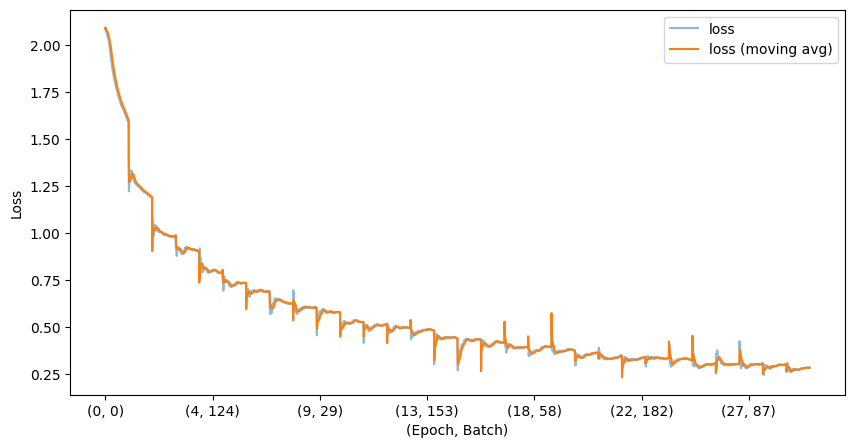

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert training_losses to a pandas DataFrame
tracking_loss_df = pd.DataFrame(training_losses, columns=['Epoch', 'Batch', 'Loss'])

# Plotting
plt.figure(figsize=(10, 5))
tracking_loss_df.set_index(['Epoch', 'Batch'])['Loss'].plot(alpha=0.5, label="loss")
tracking_loss_df.groupby('Epoch')['Loss'].rolling(window=25, min_periods=1).mean().reset_index(level=0, drop=True).plot(label="loss (moving avg)")
plt.xlabel("(Epoch, Batch)")
plt.ylabel("Loss")
plt.legend(loc=0)
plt.show()

In [62]:
tracking_loss_df

,Epoch,Batch,Loss
0,0,0,2.085233
1,0,1,2.081848
2,0,2,2.093370
3,0,3,2.088246
4,0,4,2.085352
...,...,...,...
6565,29,214,0.285478
6566,29,215,0.284891
6567,29,216,0.285349
6568,29,217,0.285173


Now let's plot the loss by epoch and batch. The x-axis here is a tuple of (epoch, batch).

# Save the model
We have the model loaded in memory already, so we don't really need to save the model, but it's often useful to do this so we can use it again later.

Here's how:

In [63]:
torch.save(model, "model.pth")

# Validation

1. Define Hyperparameters: Hyperparameters are settings that control the learning process of the model but are not learned from the data. Examples include learning rate and batch size.
2. Split Data: Split your dataset into training, validation, and testing sets. The training set is used to train the model, the validation set is used to tune hyperparameters and evaluate model performance during training, and the testing set is used for final evaluation after training.
3. Training Loop: Iterate through different combinations of hyperparameters. For each combination:
* Train Model: Train the model on the * training set using the specified hyperparameters.
* Evaluate on Validation Set: Evaluate the trained model on the validation set to measure its performance using metrics such as accuracy, loss, etc.
4. Choose Best Hyperparameters: Select the hyperparameters that yield the best performance on the validation set. This is typically based on the validation metric you're optimizing for (e.g., highest accuracy, lowest loss).
5. Final Evaluation: Once you've selected the best hyperparameters, evaluate the model on the testing set to get an unbiased estimate of its performance.

In [64]:
loaded_model = torch.load("model.pth")

In [ ]:
val_dataset = ImagesDataset(x_val, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle= True, num_workers = 4 )

## Making Hyperameter tuning

# Evaluation
So far, not so bad. We've shown an improvement in the loss on the training set, but that tells us little about how our model will do on new data. Let's reload our saved model and try generating some predictions on the evaluation split we created earlier.

In [65]:
loaded_model = torch.load("model.pth")

In [66]:
eval_dataset = ImagesDataset(x_val, y_val)
eval_dataloader = DataLoader(eval_dataset, batch_size=64, shuffle= True, num_workers = 4 )

# Make Predictions
We'll iterate through the eval dataloader in batches, just like we did for training, but this time we aren't going to need to compute gradients or update weights. For each batch, we'll do the following:

1. Run the forward pass to get the model output or logits
2. Apply a softmax function to convert the logits into probability space with range[0,1]. During training, the softmax operation was handled internally by nn.CrossEntropyLoss. We aren't computing the loss now because we are just doing evaluation, but we still want the predictions to be in the range[0,1].
3. Store the results in a dataframe for further analysis

  0%|          | 0/39 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 39/39 [00:10<00:00,  3.79it/s]


Average Loss: 0.4931051171742953


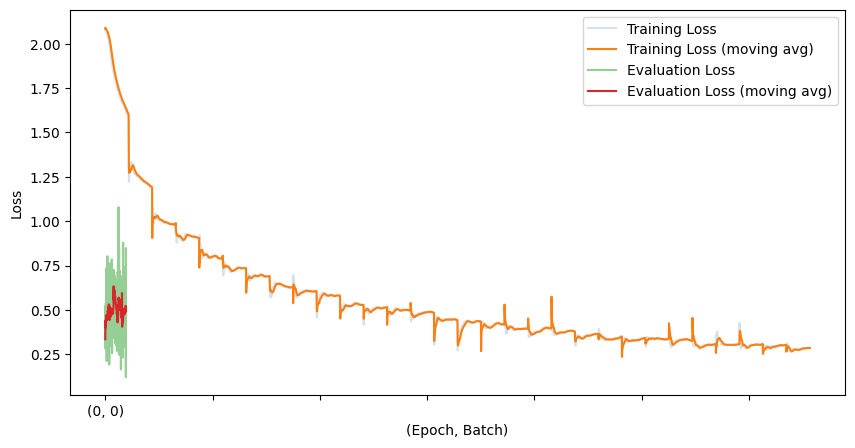

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from tqdm import tqdm
import pandas as pd

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 5

preds_collector = []
losses = []  # To collect the loss for each epoch

# Format similar to training_losses
evaluation_losses = []

# Collect batch info for evaluation losses
batch_info_eval = []

# put the model in eval mode so we don't update any parameters
model.eval()

# we aren't updating our weights so no need to calculate gradients
with torch.no_grad():
    for epoch in range(num_epochs):  # Assuming you have access to num_epochs
        for batch_idx, batch in enumerate(tqdm(eval_dataloader, total=len(eval_dataloader))):
            # Move batch data to GPU
            batch["image"] = batch["image"].to(device)
            batch["label"] = batch["label"].to(device)

            # 1) run the forward step
            logits = model.forward(batch["image"])

            # 2) compute loss
            loss = criterion(logits, batch["label"])
            losses.append((epoch, batch_idx, loss.item()))  # Append tuple (epoch, batch, loss)
            evaluation_losses.append(loss.item())  # Collecting loss for evaluation set

            # 3) apply softmax so that model outputs are in range [0,1]
            preds = nn.functional.softmax(logits, dim=1)

            # 4) store this batch's predictions along with epoch and batch info
            preds_df = pd.DataFrame(
                preds.cpu().detach().numpy(),
                index=batch["image_id"].cpu().numpy(),  # Convert tensor to numpy array
                columns=species_labels,
            )
            preds_collector.append(preds_df)
            batch_info_eval.append((epoch, batch_idx))

eval_preds_df = pd.concat(preds_collector)
average_loss = np.mean(evaluation_losses)
print("Average Loss:", average_loss)

# Convert evaluation_losses to a pandas DataFrame
tracking_loss_df_eval = pd.DataFrame(losses, columns=['Epoch', 'Batch', 'Loss'])

In [115]:
eval_preds_df

,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
15780,4.007483e-04,2.619150e-05,0.054861,1.562171e-03,2.293277e-06,1.371681e-05,5.855684e-06,9.431275e-01
8213,9.044950e-01,8.311700e-05,0.003466,9.843231e-04,1.786532e-02,7.268202e-02,3.103540e-04,1.141924e-04
15694,1.617587e-03,9.960713e-01,0.001334,5.635985e-08,9.065821e-07,8.383813e-06,9.198989e-04,4.824920e-05
4379,1.829976e-09,3.624547e-12,0.000007,7.236551e-13,1.312558e-10,9.999928e-01,6.286667e-11,1.844143e-13
8527,5.168950e-03,1.050209e-04,0.815391,2.351624e-02,7.501991e-04,1.693735e-03,1.068624e-04,1.532683e-01
...,...,...,...,...,...,...,...,...
12704,2.289373e-05,1.007742e-08,0.002479,9.968759e-01,4.540891e-08,1.657696e-07,2.561294e-08,6.221102e-04
2495,3.230057e-06,3.796553e-07,0.000084,2.601404e-11,3.052936e-09,1.316748e-07,9.999126e-01,8.947903e-09
514,3.018012e-03,9.788212e-01,0.016474,2.648996e-06,2.144625e-05,1.607930e-04,8.034170e-04,6.984417e-04
9790,4.051402e-03,1.086465e-04,0.508903,1.248022e-02,5.862670e-04,2.527614e-04,4.803617e-05,4.735695e-01


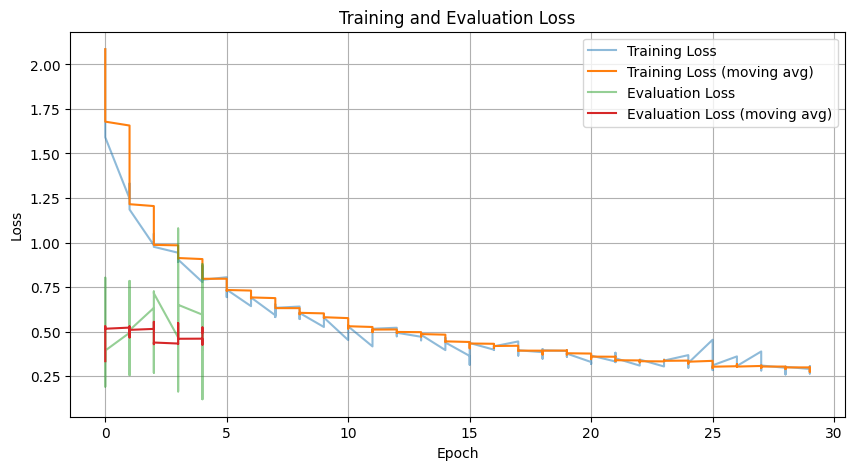

In [123]:
# Plotting
plt.figure(figsize=(10, 5))

# Plot only a subset of the data
subset_tracking_loss_df = tracking_loss_df.iloc[::5]  # Select every 5th row

# Plot training loss
plt.plot(subset_tracking_loss_df['Epoch'], subset_tracking_loss_df['Loss'], label="Training Loss", alpha=0.5)
plt.plot(subset_tracking_loss_df['Epoch'], subset_tracking_loss_df['Loss'].rolling(window=25, min_periods=1).mean(), label="Training Loss (moving avg)")

# Plot evaluation loss
plt.plot(tracking_loss_df_eval['Epoch'], tracking_loss_df_eval['Loss'], label="Evaluation Loss", alpha=0.5)
plt.plot(tracking_loss_df_eval['Epoch'], tracking_loss_df_eval['Loss'].rolling(window=25, min_periods=1).mean(), label="Evaluation Loss (moving avg)")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Evaluation Loss")
plt.legend(loc=0)
plt.grid(True)
plt.show()


In [70]:
print("True labels (training):")
y_train.idxmax(axis=1).value_counts()

True labels (training):


monkey_prosimian    2118
antelope_duiker     2103
civet_genet         2059
leopard             1916
blank               1881
rodent              1711
bird                1395
hog                  831
Name: count, dtype: int64

In [71]:
print("Predicted labels (eval):")
eval_preds_df.idxmax(axis=1).value_counts()

Predicted labels (eval):


monkey_prosimian    1991
leopard             1839
civet_genet         1828
antelope_duiker     1798
blank               1603
rodent              1462
bird                1150
hog                  699
Name: count, dtype: int64

In [72]:
print("True labels (eval):")
y_val.idxmax(axis=1).value_counts()

True labels (eval):


monkey_prosimian    374
antelope_duiker     371
civet_genet         364
leopard             338
blank               332
rodent              302
bird                246
hog                 147
Name: count, dtype: int64

# Comparison of Epoch Losses on Training,Validation and Testing Datasets

# Accuracy

Now let's compute how accurate our model is and compare that against some trivial baseline models. First let's get the labels with the highest score for each image.

In [73]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_predictions.head()

15780             rodent
8213     antelope_duiker
15694               bird
4379             leopard
8527               blank
dtype: object

In [74]:
eval_true = y_val.idxmax(axis=1)

(eval_true == "monkey_prosimian").sum() / len(eval_predictions)

0.030234438156831044

In [75]:
eval_predictions = eval_preds_df.idxmax(axis=1)
eval_true = y_val.idxmax(axis=1)

# Reindex eval_true to match the labels of eval_predictions
eval_true = eval_true.reindex(index=eval_predictions.index)

correct = (eval_predictions == eval_true).sum()
accuracy = correct / len(eval_predictions)
accuracy

0.8453516572352465

ValueError: Found input variables with inconsistent numbers of samples: [2474, 12370]

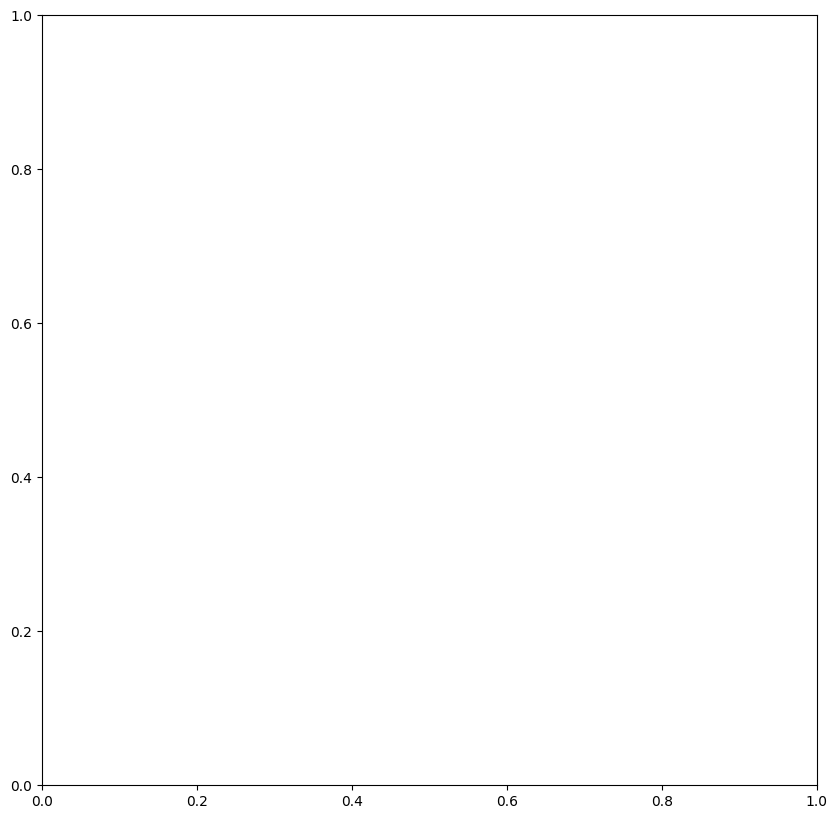

In [76]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
cm = ConfusionMatrixDisplay.from_predictions(
    y_val.idxmax(axis=1),
    eval_preds_df.idxmax(axis=1),
    ax=ax,
    xticks_rotation=90,
    colorbar=True,
)

# Creat Submission

In [108]:
test_dataset = ImagesDataset(test_features.filepath.to_frame())
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle= True, num_workers = 4 )

In [109]:
# Put the model in evaluation mode
model.eval()

# List to collect predictions
preds_collector = []

# Iterate through the test dataloader
with torch.no_grad():
    for batch in tqdm(test_dataloader, total=len(test_dataloader)):
        # Move batch data to GPU
        batch["image"] = batch["image"].to(device)

        # Run the forward step
        logits = model.forward(batch["image"])

        # Apply softmax to get probabilities
        preds = nn.functional.softmax(logits, dim=1)

        # Store this batch's predictions in a DataFrame
        preds_df = pd.DataFrame(
            preds.cpu().detach().numpy(),  # Move predictions back to CPU for DataFrame creation
            index=batch["image_id"],  # Assuming batch["image_id"] contains image IDs
            columns=species_labels,
        )
        preds_collector.append(preds_df)

# Concatenate all predictions into one DataFrame
submission_df = pd.concat(preds_collector)

# Now you have your submission DataFrame containing predictions
submission_df

  0%|          | 0/70 [00:00<?, ?it/s]/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
100%|██████████| 70/70 [08:48<00:00,  7.55s/it]


,antelope_duiker,bird,blank,civet_genet,hog,leopard,monkey_prosimian,rodent
ZJ1723,0.729928,5.391984e-03,4.903693e-02,0.000643,7.261533e-03,0.199632,6.827678e-03,1.278966e-03
ZJ2257,0.046828,7.104685e-03,4.529721e-02,0.002089,9.938971e-03,0.880761,5.203458e-03,2.778104e-03
ZJ0127,0.999931,3.809177e-07,9.532896e-07,0.000034,9.598982e-07,0.000032,3.894217e-07,7.036525e-08
ZJ1883,0.000449,2.196415e-05,5.381748e-01,0.000084,1.650116e-04,0.460412,5.796357e-04,1.139910e-04
ZJ1601,0.842087,9.163903e-02,5.187276e-02,0.003206,2.674040e-03,0.002880,2.362129e-03,3.278345e-03
...,...,...,...,...,...,...,...,...
ZJ1220,0.002470,5.800875e-06,4.783405e-02,0.943081,5.354462e-05,0.000073,2.302043e-05,6.460532e-03
ZJ1034,0.063307,4.521687e-03,6.250446e-01,0.097643,1.508670e-02,0.148980,1.046483e-02,3.495214e-02
ZJ1731,0.022175,7.495292e-04,8.273489e-01,0.000029,8.300873e-05,0.000334,1.470242e-01,2.256268e-03
ZJ2065,0.063744,3.169856e-03,9.132883e-01,0.000184,4.141576e-04,0.001108,1.205622e-02,6.035143e-03


Let's check a couple things on submission_df before submitting to the platform. We'll want to make sure our submission's index and column labels match the submission format. (The DrivenData platform will do these data integrity checks as well, but it will be quicker to detect problems this way.)

In [120]:
# Extract the image IDs from submission_df indices
image_ids = submission_df.index.tolist()

# Generate indices similar to the submission format
submission_indices = [f"ZJ{str(i + 1).zfill(4)}" for i in range(len(image_ids))]

# Update the indices of submission_df
submission_df.index = submission_indices


In [121]:
submission_format = pd.read_csv("submission_format.csv", index_col="id")

assert all(submission_df.index == submission_format.index)
assert all(submission_df.columns == submission_format.columns)

In [122]:
submission_df.to_csv("submission_df.csv")